In [ ]:
import pandas as pd
#reading dataset
df = pd.read_excel('dataset.xlsx')
#cropping the dataset on which we have to work on , the other columns are just code snippets , these are the evaluation scores
df = df.iloc[:,4:10]
df

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks
0,2,2.0,2,2.0,2,10
1,2,2.0,2,2.0,0,8
2,2,2.0,1,1.0,1,7
3,2,1.0,1,1.0,0,5
4,2,2.0,1,1.0,0,6
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,1
1172,2,2.0,2,1.0,1,8
1173,2,0.0,0,0.0,0,2
1174,2,2.0,1,2.0,1,8


In [ ]:
#.isna() returns 1 if value is 1 and 0 if not for each val in each col . so if we sum its output using.sum() function , we will have number of null values in each col
df.isna().sum()

,0
Header_and_Main_Declaration,0
Incomprehensible_Code,1
Comprehensible_Code_with_logical_errors,0
Comprehensible_code_with_syntax_errors,2
Correct_code_and_output,0
Final_Marks,0


In [ ]:
#filling missing values using pad , it is same like ffill method
df = df.fillna(method='pad')

<ipython-input-33-4d7ddb4551e6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


In [ ]:
df.isna().sum()
#now we can see there are no missing values

,0
Header_and_Main_Declaration,0
Incomprehensible_Code,0
Comprehensible_Code_with_logical_errors,0
Comprehensible_code_with_syntax_errors,0
Correct_code_and_output,0
Final_Marks,0


In [ ]:
arr = []
#if final score is more than 5 , target value will be 1 , else 0 , these will be the 2 classes
#so codes with above 5 final score are like more fundamental , and below 5 are non fundamental , and this division happened based on values of columns 4 to 9
for data in df['Final_Marks']:
    if data < 5:
        arr.append(0)
    else:
        arr.append(1)

df = df.drop('Final_Marks', axis = 1)
df['Target'] = arr

In [ ]:
df

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Target
0,2,2.0,2,2.0,2,1
1,2,2.0,2,2.0,0,1
2,2,2.0,1,1.0,1,1
3,2,1.0,1,1.0,0,1
4,2,2.0,1,1.0,0,1
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,0
1172,2,2.0,2,1.0,1,1
1173,2,0.0,0,0.0,0,0
1174,2,2.0,1,2.0,1,1


# ans1)

In [ ]:
import numpy as np
features = df.drop(columns=['Target'])
target = df['Target']

means = {}
classes = target.unique()
#as seen before , target has 2 values (classes)
for cls in classes:
    #selecting rows belonging to cls class
    class_data = features[target == cls]
    #we classified our code based on 5 criteria (5 cols which we initially cropped) , so we have 5 means , each for each criteria
    #these means are the centroids of each criteria
    means[cls] = class_data.mean(axis=0)

print("centroids:")
for cls, mean in means.items():
    print(f"Class {cls}: {mean.round(5).tolist()}")

centroids:
Class 1: [1.88662, 1.56815, 1.30828, 1.23694, 0.67643]
Class 0: [1.53197, 0.34271, 0.54476, 0.68286, 0.04348]


In [ ]:
spreads = {}

for cls in classes:
  #in previous code , we found means of 5 critera of 2 classes , this time we find standard deviation(spread)
    class_data = features[target == cls]
    spreads[cls] = class_data.std(axis=0)

print("Standard Deviations:")
for cls, spread in spreads.items():
    print(f"Class {cls}: {spread.round(5).tolist()}")

Standard Deviations:
Class 1: [0.37612, 0.76315, 0.82018, 0.71956, 0.81427]
Class 0: [0.79316, 0.64862, 0.6698, 0.76238, 0.24941]


In [ ]:
from numpy.linalg import norm
#lib function to find norm of a vector

def calculate_distance(mean1, mean2):
    return norm(mean1 - mean2)

mean0 = means[0]
mean1 = means[1]

#interclass distance between the 2 classes
distance = calculate_distance(mean0, mean1)
print(f"Distance between class 0 and class 1: {distance}")


Distance between class 0 and class 1: 1.7082418189923978


ans2)

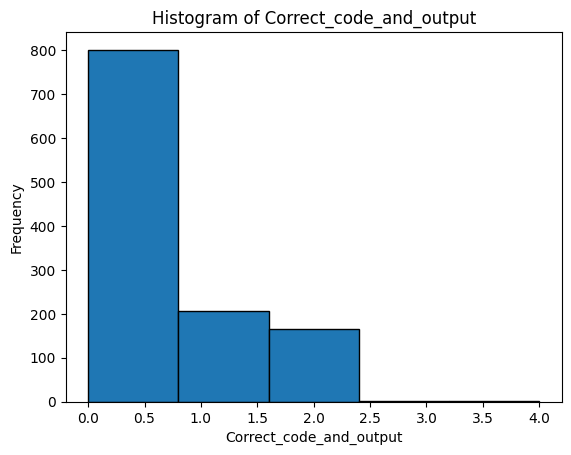

Mean of Final_Marks: 0.46598639455782315
Variance of Final_Marks: 0.5515641630801982


In [ ]:
import matplotlib.pyplot as plt
#bins are number of intervals
plt.hist(df['Correct_code_and_output'], bins=5, edgecolor='black')
plt.xlabel('Correct_code_and_output')
plt.ylabel('Frequency')
plt.title('Histogram of Correct_code_and_output')

#we selected code_output feature to plot histogram
plt.show()

#mean and variance for Final_Marks
finalMarksMean = np.mean(df['Correct_code_and_output'])
finalMarksVariance = np.var(df['Correct_code_and_output'])

print(f"Mean of Final_Marks: {finalMarksMean:}")
print(f"Variance of Final_Marks: {finalMarksVariance}")

ans3)

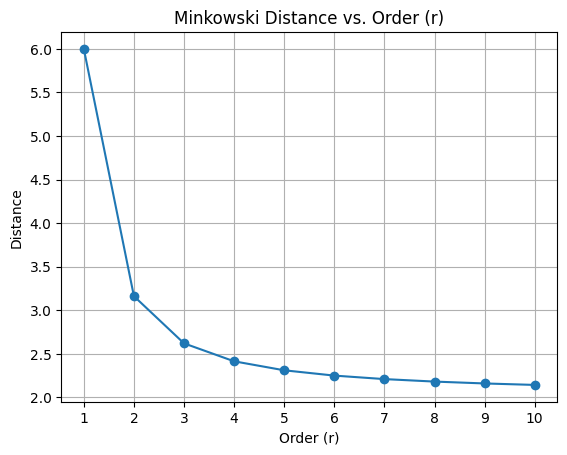

Minkowski Distance with r=1: 6.0
Minkowski Distance with r=2: 3.1622776601683795
Minkowski Distance with r=3: 2.6207413942088964
Minkowski Distance with r=4: 2.414736402766418
Minkowski Distance with r=5: 2.311579248730029
Minkowski Distance with r=6: 2.250732551659767
Minkowski Distance with r=7: 2.2106353009296393
Minkowski Distance with r=8: 2.1820785987379434
Minkowski Distance with r=9: 2.1605878472891096
Minkowski Distance with r=10: 2.1437561638927893


In [ ]:
from scipy.spatial.distance import minkowski
#lib function to calculate minowski distance

#selecting 2 feature vectors(rows)
feature_vector_1 = df.loc[0, ['Header_and_Main_Declaration', 'Incomprehensible_Code',
                              'Comprehensible_Code_with_logical_errors',
                              'Comprehensible_code_with_syntax_errors',
                              'Correct_code_and_output']].values
feature_vector_2 = df.loc[5, ['Header_and_Main_Declaration', 'Incomprehensible_Code',
                              'Comprehensible_Code_with_logical_errors',
                              'Comprehensible_code_with_syntax_errors',
                              'Correct_code_and_output']].values


r_values = np.arange(1, 11)
#minowski fn has 3 main parameters , the first 2 are vectors , the third one is value of order parameter present in the formula
#we iterate through values of r (1 to 10) , find corresponding minowski distnace and plot the graph
distances = [minkowski(feature_vector_1, feature_vector_2, r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. Order (r)')
plt.xlabel('Order (r)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance with r={r}: {dist:}")

ans4)

In [ ]:
from sklearn.model_selection import train_test_split
#this is a utility function which helps us to split dataset into testing and traing data , different combinations are tried , whichever gives best output , we have that split of data
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("X_train:")
# print(X_train)
# print("\nX_test:")
# print(X_test)
# print("\ny_train:")
# print(y_train)
# print("\ny_test:")
# print(y_test)

Training feature shape: (823, 5)
Testing feature shape: (353, 5)
Training labels shape: (823,)
Testing labels shape: (353,)
X_train:
